#  DAY 1 30-7-2022

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# data=pd.read_csv(r'Enter The Path Where The File Is',index_col=0,header=0)

In [2]:
data=pd.read_csv(r'C:\Users\LAPSHOP.IN\python\Machine_Learning\Advertising.csv',
                         index_col=0,header=0)

In [3]:
print(data.dtypes)
print(data.shape)
print(data.describe())

TV           float64
radio        float64
newspaper    float64
sales        float64
dtype: object
(200, 4)
               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000


In [4]:
data.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [5]:
data.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

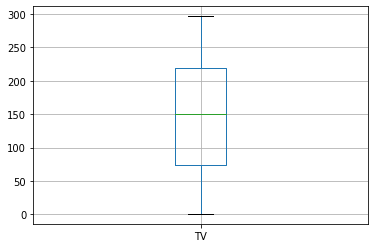

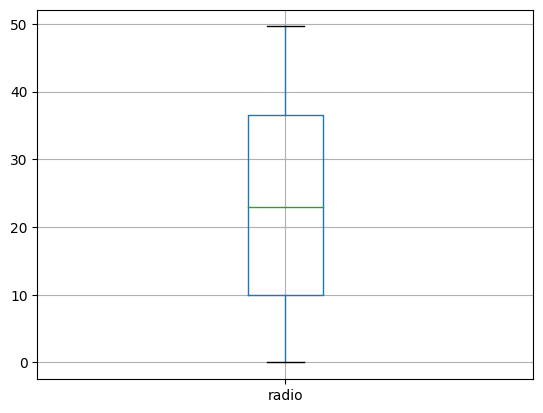

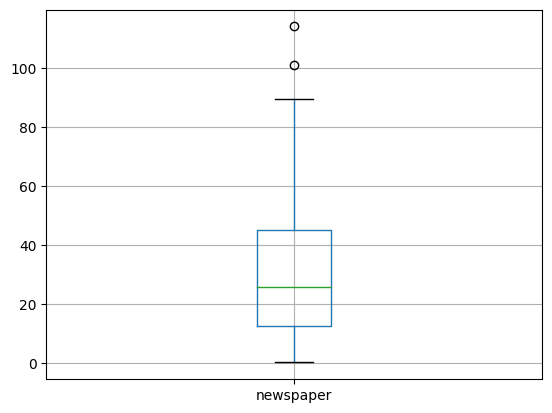

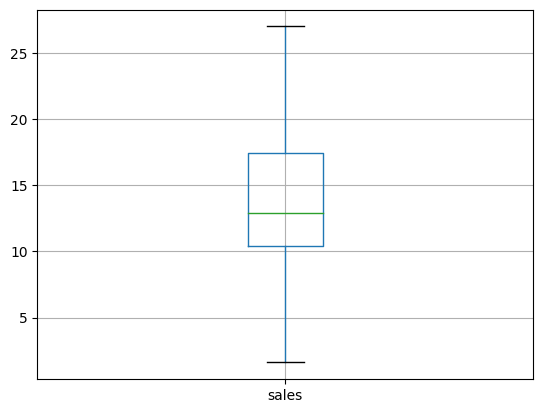

In [6]:
# Assumption 1- there should be no outliers in the data.
# check using boxplot.

for i in data.columns:
    data.boxplot(column=i)
    plt.show()

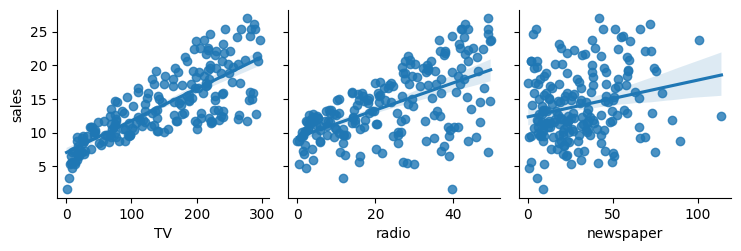

In [7]:
# assumption 2- assumption of linearity- every individual variable should have a 
# linear relationship with the dependent variable

sns.pairplot(data,x_vars=['TV', 'radio', 'newspaper'],
            y_vars="sales", kind='reg')

In [8]:
#if we wanted to drop the data from the table we would have done with treating the outliers
#data.drop(["newspaper"],axis=1,inplace=True)
# or data=data.drop(["newspaper"],axis=1)

In [9]:
# create x and y
x = data[['TV', 'radio', 'newspaper']]
y = data['sales']
#x=data.iloc[:,0:-1]
#y=data.iloc[:,-1]

In [10]:
print(x.shape)
print(y.shape)

(200, 3)
(200,)


C:\Users\LAPSHOP.IN\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

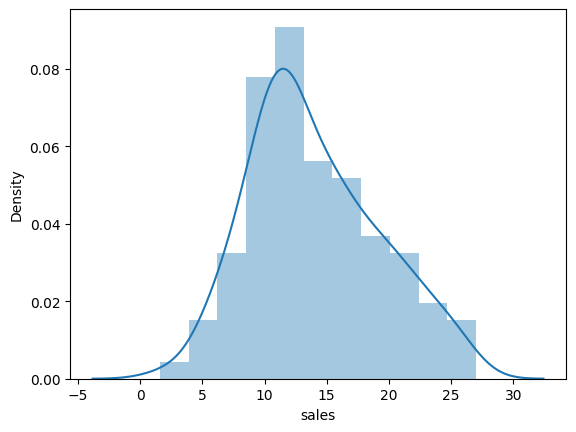

In [11]:
# assumption of normality: the dependent variable should follow as approximate normal distribution
sns.distplot(y)

In [12]:
"""
# log transformation
import numpy as np
y_log=np.log(y)
"""
# it is to be used when in the data there is not a normal distribution of the data.

'\n# log transformation\nimport numpy as np\ny_log=np.log(y)\n'

In [13]:
#sns.distplot(y_log,hist=True)

array([[<AxesSubplot:title={'center':'TV'}>,
        <AxesSubplot:title={'center':'radio'}>],
       [<AxesSubplot:title={'center':'newspaper'}>, <AxesSubplot:>]],
      dtype=object)

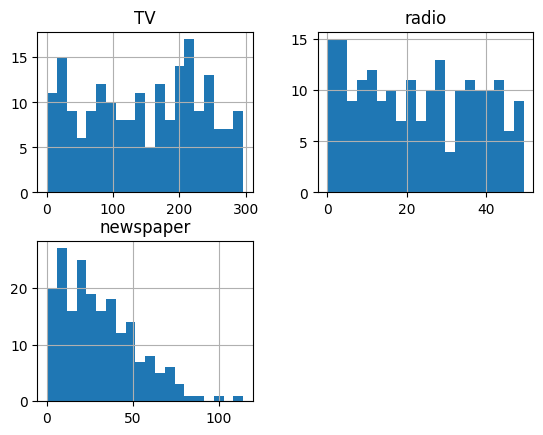

In [14]:
x.hist(bins=20)

In [15]:
from scipy.stats import skew
#finding the skewness in each variable
data_num_skew = x.apply(lambda i: skew(i.dropna()))
#subsetting the variables that are highly skewed
data_num_skewed = data_num_skew[(data_num_skew > .75) | (data_num_skew < -.75)]

print(data_num_skew)
print(data_num_skewed)
import numpy as np
# apply log + 1 transformation for all numeric features with skewness over .75
x[data_num_skewed.index] = np.log1p(x[data_num_skewed.index])

TV          -0.069328
radio        0.093467
newspaper    0.887996
dtype: float64
newspaper    0.887996
dtype: float64


C:\Users\LAPSHOP.IN\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


06/08/2022

                 TV     radio  newspaper
TV         1.000000  0.054809   0.030951
radio      0.054809  1.000000   0.251909
newspaper  0.030951  0.251909   1.000000


<AxesSubplot:>

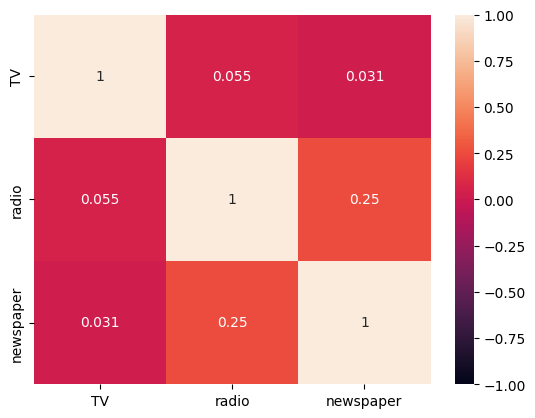

In [16]:
#assumption of no multi collinearity: there should not be no multicollinearity between the independent
#variables.
# multicollinearity is the relationship amongst the independent variables
# it only compare relationship between the independent two variables 

corr_df=x.corr(method="pearson")
print(corr_df)

sns.heatmap(corr_df,vmax =1.0, vmin=-1.0,annot=True)

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vif_df = pd.DataFrame()
vif_df["features"] = x.columns
vif_df["VIF Factor"] = [vif(x.values, i) for i in range(x.shape[1])]
vif_df.round(2)

,features,VIF Factor
0,TV,3.39
1,radio,3.63
2,newspaper,5.44


In [18]:
#x.drop("newspaper",axis=1,inplace=True)
# rerun the VIF code with remaining variables

In [19]:
# building a model
from sklearn.model_selection import train_test_split

#split the data into test and train
#random_state=10 will be the same random split and not randomly all the time we run the kernal
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [20]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(160, 3)
(160,)
(40, 3)
(40,)


In [21]:
#>1000--> test_size=0.3
#<1000--> test_size=0.2
#if we don write the code test_size will automatically will be equal to 0.25

In [22]:
from sklearn.linear_model import LinearRegression

# create a model object
lm=LinearRegression()

# trainig the model object--> fit function will fit the variables in the model
lm.fit(X_train,Y_train)

# print intercept and coefficiens

print(lm.intercept_)
print(lm.coef_)

3.353291385815151
[ 0.0437425   0.19303708 -0.04895137]


In [23]:
#pair the feature names with the coefficients
print(list(zip(x.columns, lm.coef_)))

[('TV', 0.04374250157742165), ('radio', 0.19303707897345299), ('newspaper', -0.04895136822248785)]


In [24]:
# prediction we have done manually
X1=100
X2=200
X3=np.log1p(0)

y_pred=3.353291385815151+(0.0437425*X1)+(0.19303708*X2)+(-0.04895137*X3)
print(y_pred)

46.33495738581515


In [25]:
# predict using the model
y_pred=lm.predict(X_test)
print(y_pred)

[18.15026866 12.96136899 18.05815332 23.66025079 20.68751041 14.26325872
 14.92774472 21.38847375 21.14752911 12.75788534 23.99735583  7.20632737
 12.30777109 19.22813333 19.41581583 13.44985803 19.62619644  9.24667496
 21.1052867  20.87838433 15.52611251 10.91695579 22.82910679 15.82915597
 17.40742204  8.17170435 11.88738387 12.69866637 21.71275044  7.94920205
 12.49118989 20.43292079  4.71443086  4.72126238 16.7504848  15.74384945
  6.74775596 17.73750244  9.01170001 13.60841593]


In [26]:
lm.score(X_train,Y_train)
#Y_pred=lm.predict(X_train)
#score=r2_score(Y_train,Y_pred)

0.9208986647500219

In [27]:
new_df=pd.DataFrame()
new_df=X_test.copy()

new_df["Actual sales"]=Y_test
new_df["Predicted sales"]=y_pred
new_df

,TV,radio,newspaper,Actual sales,Predicted sales
60,210.7,29.5,2.332144,18.4,18.150269
6,8.7,48.9,4.330733,7.2,12.961369
21,218.4,27.7,3.996364,18.0,18.058153
199,283.6,42.0,4.207673,25.5,23.660251
53,216.4,41.7,3.703768,22.6,20.687510
20,147.3,23.9,3.000720,14.6,14.263259
163,188.4,18.1,3.280911,14.9,14.927745
56,198.9,49.4,4.110874,23.7,21.388474
70,216.8,43.9,3.339322,22.3,21.147529
3,17.2,45.9,4.252772,9.3,12.757885


In [28]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

# the r2 is close to 1 and the adjusted r2 is also closed to r2. so the overall model seems to be good
# the rmse is also low compared to the range of y values

R-squared: 0.834801071903532
RMSE: 2.59297691109306
Adj R-square: 0.8322725168816474


In [29]:
print(Y_test.min())
print(Y_test.max())

1.6
25.5


In [30]:
new_df["Deviation"]=new_df["Actual sales"]-new_df["Predicted sales"]
new_df.to_excel("Salesprediction.xlsx", header=True,index=True)
new_df.head()

,TV,radio,newspaper,Actual sales,Predicted sales,Deviation
60,210.7,29.5,2.332144,18.4,18.150269,0.249731
6,8.7,48.9,4.330733,7.2,12.961369,-5.761369
21,218.4,27.7,3.996364,18.0,18.058153,-0.058153
199,283.6,42.0,4.207673,25.5,23.660251,1.839749
53,216.4,41.7,3.703768,22.6,20.687510,1.912490


In [31]:
#sns.regplot(x=Y_train,y=lm.)

In [32]:
from sklearn.linear_model import Ridge
lm = Ridge()
lm.fit(X_train,Y_train)

#print intercept and correlation
print(lm.intercept_)
print(lm.coef_)

3.352247172596602
[ 0.04374234  0.19302603 -0.04853131]


In [33]:
Y_pred=lm.predict(X_test)

In [34]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

"""R-squared: 0.834801071903532
RMSE: 2.59297691109306
Adj R-square: 0.8322725168816474"""
# the r2 is close to 1 and the adjusted r2 is also closed to r2. so the overall model seems to be good
# the rmse is also low compared to the range of y values

R-squared: 0.8348082644975934
RMSE: 2.5929204626839986
Adj R-square: 0.832279819566434


'R-squared: 0.834801071903532\nRMSE: 2.59297691109306\nAdj R-square: 0.8322725168816474'

In [35]:
from sklearn.linear_model import Lasso
lm = Lasso()
lm.fit(X_train,Y_train)

#print intercept and correlation
print(lm.intercept_)
print(lm.coef_)

3.336794058220317
[ 0.04362374  0.18766033 -0.        ]


In [36]:
Y_pred=lm.predict(X_test)

In [37]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

"""R-squared: 0.834801071903532
RMSE: 2.59297691109306
Adj R-square: 0.8322725168816474"""

R-squared: 0.8360506658527163
RMSE: 2.5831514271094234
Adj R-square: 0.8335412372688292


'R-squared: 0.834801071903532\nRMSE: 2.59297691109306\nAdj R-square: 0.8322725168816474'

07/08/2022

In [38]:
new_df=pd.DataFrame()
new_df=X_train.copy()

new_df["sales"]=Y_train.copy()
new_df.shape

(160, 4)

In [39]:
import statsmodels.formula.api as sm

# create a fitted model with all three features
lm_model = sm.ols(formula='sales ~ TV + radio + newspaper', 
                  data=new_df).fit()

# print the coefficients
print(lm_model.params)
print(lm_model.summary())

"""
3.3532913858151527
[ 0.0437425   0.19303708 -0.04895137]

"""

Intercept    3.353291
TV           0.043743
radio        0.193037
newspaper   -0.048951
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     605.4
Date:                Sun, 07 Aug 2022   Prob (F-statistic):           1.10e-85
Time:                        13:16:04   Log-Likelihood:                -276.63
No. Observations:                 160   AIC:                             561.3
Df Residuals:                     156   BIC:                             573.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

'\n3.3532913858151527\n[ 0.0437425   0.19303708 -0.04895137]\n\n'

In [40]:
Y_pred=lm_model.predict(X_test)

In [41]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8348010719035376
RMSE: 2.5929769110930163
Adj R-square: 0.8322725168816529


In [42]:
import statsmodels.formula.api as sm

#create a fitted model with two features
lm_model = sm.ols(formula='sales ~ TV + radio', data=new_df).fit()

# print the coefficient
print(lm_model.params)
print(lm_model.summary())

Intercept    3.217026
TV           0.043721
radio        0.192425
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     912.9
Date:                Sun, 07 Aug 2022   Prob (F-statistic):           3.47e-87
Time:                        13:16:04   Log-Likelihood:                -276.70
No. Observations:                 160   AIC:                             559.4
Df Residuals:                     157   BIC:                             568.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [44]:
Y_pred=lm_model.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8354496662944217
RMSE: 2.58788170773781
Adj R-square: 0.8329310387377037


## Post Model Building Assumption

##### Assumption-1

C:\Users\LAPSHOP.IN\AppData\Roaming\Python\Python37\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Residuals')

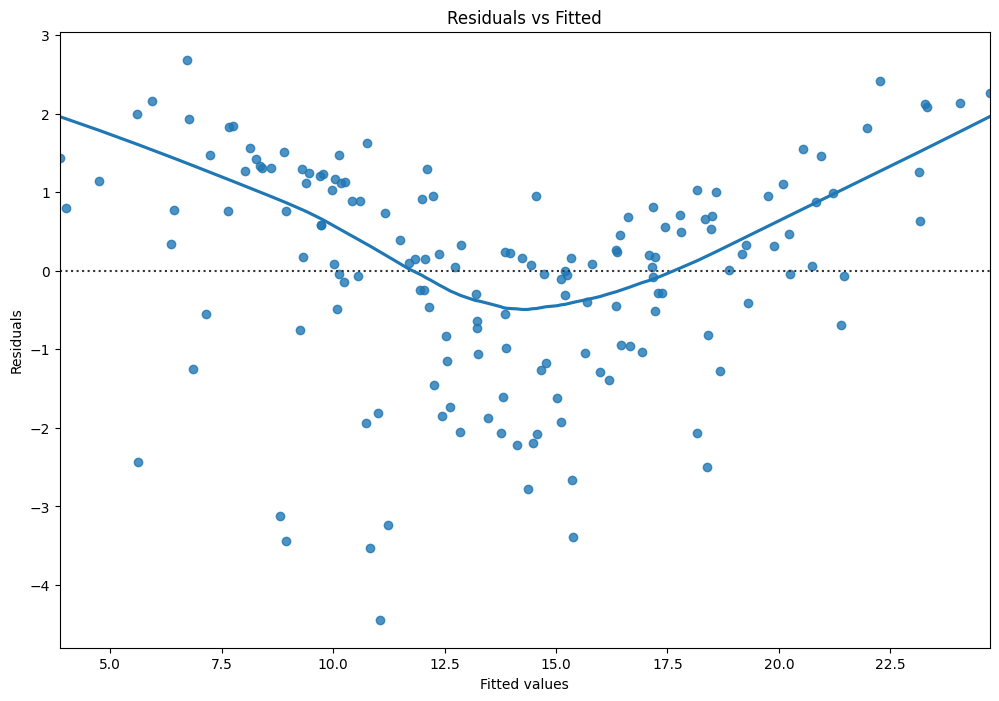

In [45]:
#Assumption: Errors should be random
#checked using Residual v/s Fitted plot

import matplotlib.pyplot as plt
plot_lm_1 = plt.figure(1)
plot_lm_1.set_figheight(8)
plot_lm_1.set_figwidth(12)

# fitted values (need a constant term for intercept)
model_fitted_y = lm_model.fittedvalues

plot_lm_1.axes[0] = sns.residplot(model_fitted_y, 'sales', data=new_df, lowess=True)

plot_lm_1.axes[0].set_title('Residuals vs Fitted')
plot_lm_1.axes[0].set_xlabel('Fitted values')
plot_lm_1.axes[0].set_ylabel('Residuals')

# the line that is fitted in data should be a random line and should not follow a wave like pattern

#### Assumption-2|

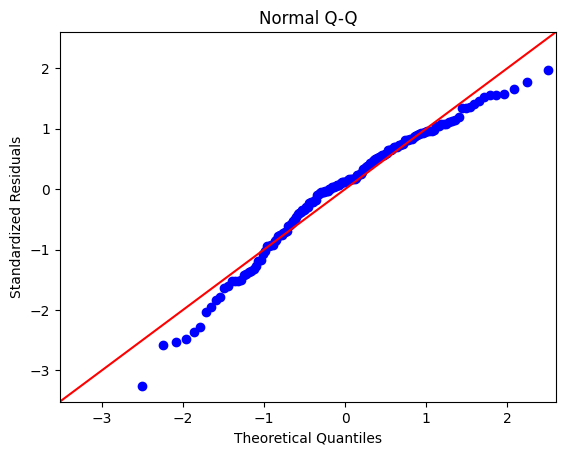

In [48]:
#Assumption: Errors should follow a approximate normal distribution
#checked using Normal QQ plot

res = lm_model.resid
import statsmodels.api as stm
import scipy.stats as stats
fig = stm.qqplot(res,  fit=True, line='45')
plt.title('Normal Q-Q')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Standardized Residuals')
plt.show() 

#errors points should follow the red diagnol line that means there is a normal distribution
# to meet the assumption

#### Assumption-3

Text(0, 0.5, '$\\sqrt{|Standardized Residuals|}$')

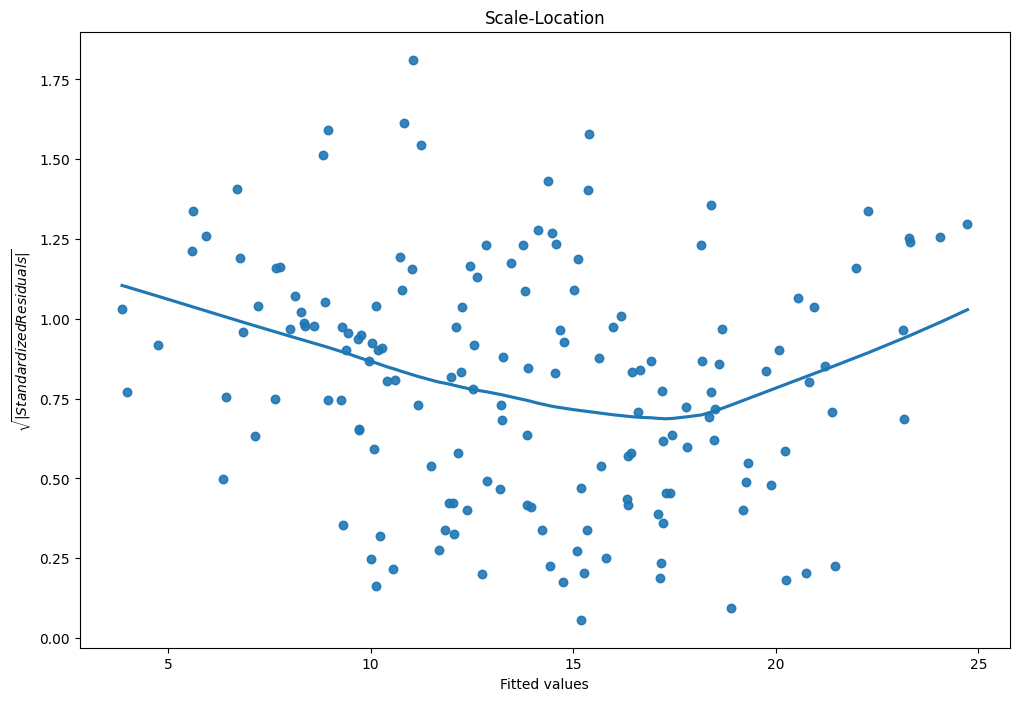

In [49]:
#Assumption: Errors should follow a constant variance-->Homoskedasticity
#hetroskedasticity
#checked using Scale location plot

# normalized residuals
model_norm_residuals = lm_model.get_influence().resid_studentized_internal
# absolute squared normalized residuals
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

plot_lm_3 = plt.figure(3)
plot_lm_3.set_figheight(8)
plot_lm_3.set_figwidth(12)
plt.scatter(model_fitted_y, model_norm_residuals_abs_sqrt, alpha=0.5)
sns.regplot(model_fitted_y, model_norm_residuals_abs_sqrt, lowess=True)


plot_lm_3.axes[0].set_title('Scale-Location')
plot_lm_3.axes[0].set_xlabel('Fitted values')
plot_lm_3.axes[0].set_ylabel('$\sqrt{|Standardized Residuals|}$')

# if there is steep curve line in the variance then there is an hetroskedasticity variance and 
# if there is an horizontal/ slightly curve line than there is an homoskedasticity variance

## SGD-Stochastic Gradient Descent TEST For ML/DL/NLP

In [50]:
# create X and Y
X = data[['TV', 'radio', 'newspaper']]
Y = data['sales']

In [51]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X=scaler.fit_transform(X)
#scaler.fit(X)
#X=scaler.transform(X)
print(X)

[[ 9.69852266e-01  9.81522472e-01  1.77894547e+00]
 [-1.19737623e+00  1.08280781e+00  6.69578760e-01]
 [-1.51615499e+00  1.52846331e+00  1.78354865e+00]
 [ 5.20496822e-02  1.21785493e+00  1.28640506e+00]
 [ 3.94182198e-01 -8.41613655e-01  1.28180188e+00]
 [-1.61540845e+00  1.73103399e+00  2.04592999e+00]
 [-1.04557682e+00  6.43904671e-01 -3.24708413e-01]
 [-3.13436589e-01 -2.47406325e-01 -8.72486994e-01]
 [-1.61657614e+00 -1.42906863e+00 -1.36042422e+00]
 [ 6.16042873e-01 -1.39530685e+00 -4.30581584e-01]
 [-9.45155670e-01 -1.17923146e+00 -2.92486143e-01]
 [ 7.90028350e-01  4.96973404e-02 -1.22232878e+00]
 [-1.43908760e+00  7.99208859e-01  1.62704048e+00]
 [-5.78501712e-01 -1.05768905e+00 -1.07502697e+00]
 [ 6.66253447e-01  6.50657027e-01  7.11007392e-01]
 [ 5.64664612e-01  1.65000572e+00  1.02862691e+00]
 [-9.25304978e-01  9.00494200e-01  3.84117072e+00]
 [ 1.56887609e+00  1.10306488e+00  1.16211917e+00]
 [-9.08957349e-01 -1.86635121e-01 -5.64073843e-01]
 [ 3.00679600e-03  4.29449843e-

In [52]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,
                                                    random_state=10)  

In [54]:
from sklearn.linear_model import SGDRegressor

lm = SGDRegressor(learning_rate="constant",  
                  #want to use a constant learning rate
                  eta0=0.01,  #alpha
                  shuffle=True, 
        #while going ahead with the next epoch shuffle the odds
                  random_state=10, #set seed
                  max_iter=1000, #max no of epochs
                  early_stopping=True, 
                  #stop if zero convergence is reached first
                  n_iter_no_change=5) 
        #no of obs to wait for before concluding upon early stopping
lm.fit(X_train,Y_train)


# print intercept and coefficients
print (lm.intercept_)
print (lm.coef_)

[14.12339593]
[ 3.81092365  2.80450708 -0.04411337]


In [56]:
Y_pred=lm.predict(X_test)

from sklearn.metrics import r2_score,mean_squared_error
import numpy as np

r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)

rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)

adjusted_r_squared = 1 - (1-r2)*(len(y)-1)/(len(y)-x.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.8385034893701074
RMSE: 2.5637555216282193
Adj R-square: 0.8360316040033233


In [ ]:
pd.set_option('display.float_format', '{:4f}')

In [57]:
#this function is used to see how much the model has run the maximum epoch
lm.n_iter_

7

In [58]:
#this function is used to see how the model has run the maximum iteration
lm.t_

1121.0